In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [2]:
data = pd.read_csv("data/smiles_list_25000.csv")
made_by = pd.DataFrame(data['made_by'], columns=['made_by'])
data

,SMILES,made_by
0,c1ccc(P(c2ccccc2)c2ccccc2N2c3ccccc3Nc3cccc(-c4...,e=1-0.1
1,N#CC(C#N)=C1c2ccccc2C(=O)c2c1ccc(-c1ccc3c(n1)[...,e=1-0.1
2,CN(C)c1ccc(C2=CS(N(C)C)(N3c4ccccc4C(C)(C)c4ccc...,e=1-0.1
3,CN(C)c1ccc(N2c3ccccc3C(C)(C)c3cc(N(c4ccc(F)cc4...,e=1-0.1
4,C=CC1=C(c2ccc(N(C)C)cc2)C(=O)C(c2ccc3cccc4c3c2...,e=1-0.1
...,...,...
101239,COC(C=C1)=CC=C1C2=CC(C3=CC=C(C=C3)OC)=CC(C4=CC...,real
101240,C[N+]1=C(C=CC=C2)C2=CC3=CC=CC=C31,real
101241,C[N+]1=C(C=CC=C2)C2=C(C3=CC=CC=C3)C4=CC=CC=C41,real
101242,C[N+]1=C(C=CC=C2)C2=C(C3=C(C=C(C=C3C)C)C)C4=CC...,real


In [3]:
mf_2 = []
for i in range(0, len(data)):
    mol_2 = Chem.MolFromSmiles(data["SMILES"][i])
    fp_2 = AllChem.GetMorganFingerprintAsBitVect(mol_2, 2, 2048)
    mf_2.append(np.array(fp_2, int))

df = pd.DataFrame(mf_2)
df = df.add_prefix('MF2_')
print(df.shape)
df.to_csv('result/MF/df_MF.csv', index = False)
df

(101244, 2048)


,MF2_0,MF2_1,MF2_2,MF2_3,MF2_4,MF2_5,MF2_6,MF2_7,MF2_8,MF2_9,...,MF2_2038,MF2_2039,MF2_2040,MF2_2041,MF2_2042,MF2_2043,MF2_2044,MF2_2045,MF2_2046,MF2_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# UMAP
X = np.array(df)
reducer = umap.UMAP(random_state=42)
X_2d = reducer.fit_transform(X)
df_umap = pd.DataFrame(X_2d)
df_umap = df_umap.add_prefix('UMAP_')
df_umap

C:\Users\noton\anaconda3\envs\Deep1\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_0,UMAP_1
0,9.200288,10.236115
1,-0.805001,9.599178
2,9.536107,11.478250
3,9.329480,3.704865
4,9.249213,3.812126
...,...,...
101239,14.154158,9.551847
101240,12.505175,9.149519
101241,12.662851,9.145616
101242,12.723241,9.239191


In [5]:
df_umap = pd.concat([df_umap, made_by], axis=1, join='inner')
df_umap.head()

,UMAP_0,UMAP_1,made_by
0,9.200288,10.236115,e=1-0.1
1,-0.805001,9.599178,e=1-0.1
2,9.536107,11.478250,e=1-0.1
3,9.329480,3.704865,e=1-0.1
4,9.249213,3.812126,e=1-0.1


In [6]:
MF_umap_human = df_umap[df_umap['made_by'] == 'human']
MF_umap_e1_01 = df_umap[df_umap['made_by'] == 'e=1-0.1']
MF_umap_e1 = df_umap[df_umap['made_by'] == 'e=1']
MF_umap_e01 = df_umap[df_umap['made_by'] == 'e=0.1']
MF_umap_real = df_umap[df_umap['made_by'] == 'real']

MF_umap_human.to_csv('result/MF/MF_umap_human.csv', index = False)
MF_umap_e1_01.to_csv('result/MF/MF_umap_e1_01.csv', index = False)
MF_umap_e1.to_csv('result/MF/MF_umap_e1.csv', index = False)
MF_umap_e01.to_csv('result/MF/MF_umap_e01.csv', index = False)
MF_umap_real.to_csv('result/MF/MF_umap_real.csv', index = False)

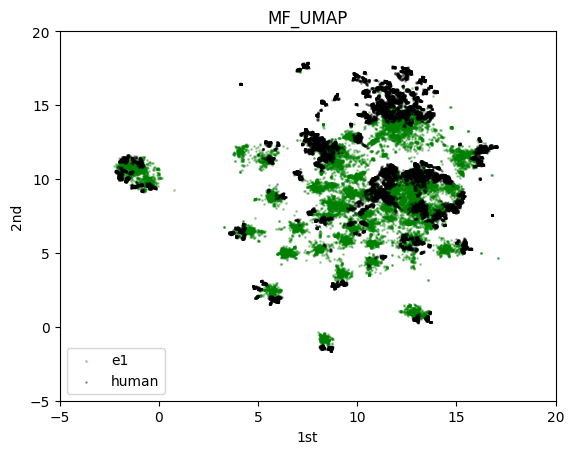

In [16]:
fig = plt.figure()
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=1, alpha=0.3)
plt.scatter(MF_umap_human['UMAP_0'], MF_umap_human['UMAP_1'], color='black', label='human', s=1, alpha=0.3)
plt.title("MF_UMAP")
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-5, 20)
plt.ylim(-5, 20)
plt.legend(loc='lower left') 
plt.show()
fig.savefig('result/MF/UMAP_0.png')

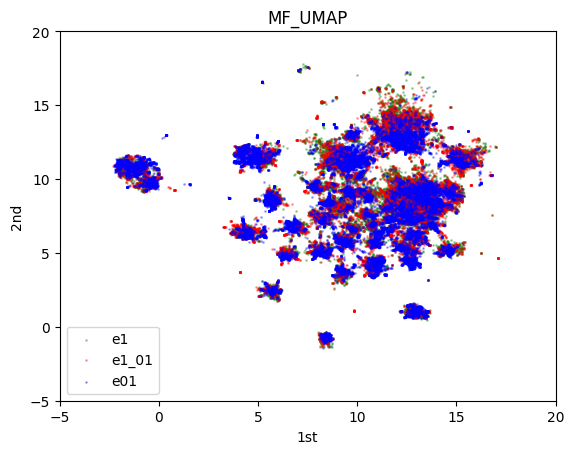

In [17]:
fig = plt.figure()
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=1, alpha=0.3)
plt.scatter(MF_umap_e1_01['UMAP_0'], MF_umap_e1_01['UMAP_1'], color='red', label='e1_01', s=1, alpha=0.3)
plt.scatter(MF_umap_e01['UMAP_0'], MF_umap_e01['UMAP_1'], color='blue', label='e01', s=1, alpha=0.3)
plt.title("MF_UMAP")
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-5, 20)
plt.ylim(-5, 20)
plt.legend(loc='lower left') 
plt.show()
fig.savefig('result/MF/UMAP_1.png')

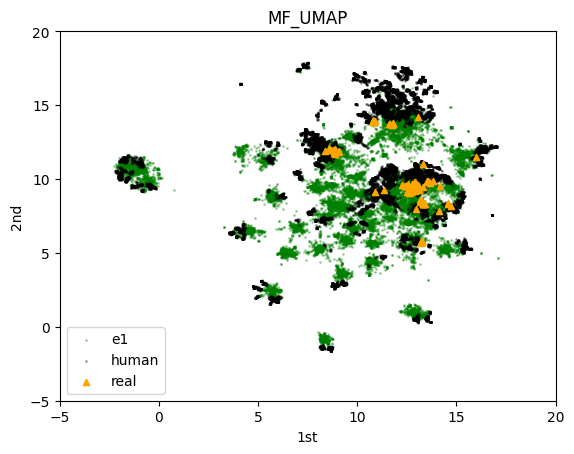

In [18]:
fig = plt.figure()
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=1, alpha=0.3)
plt.scatter(MF_umap_human['UMAP_0'], MF_umap_human['UMAP_1'], color='black', label='human', s=1, alpha=0.3)
plt.scatter(MF_umap_real['UMAP_0'], MF_umap_real['UMAP_1'], color='orange', label='real', marker='^', s=20)
plt.title("MF_UMAP")
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-5, 20)
plt.ylim(-5, 20)
plt.legend(loc='lower left') 
plt.show()
fig.savefig('result/MF/UMAP_2.png')

In [10]:
# TSNE
X = np.array(df)
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_2d)
df_tsne = df_tsne.add_prefix('TSNE_')
df_tsne

,TSNE_0,TSNE_1
0,-56.918316,-10.238436
1,-34.624001,93.482651
2,6.707209,-38.961437
3,56.287167,45.890518
4,53.146458,46.455853
...,...,...
101239,62.114689,-17.932329
101240,33.190853,-16.540300
101241,33.106625,-16.459991
101242,33.310837,-16.399059


In [11]:
df_tsne = pd.concat([df_tsne, made_by], axis=1, join='inner')
df_tsne.head()

,TSNE_0,TSNE_1,made_by
0,-56.918316,-10.238436,e=1-0.1
1,-34.624001,93.482651,e=1-0.1
2,6.707209,-38.961437,e=1-0.1
3,56.287167,45.890518,e=1-0.1
4,53.146458,46.455853,e=1-0.1


In [12]:
MF_tsne_human = df_tsne[df_tsne['made_by'] == 'human']
MF_tsne_e1_01 = df_tsne[df_tsne['made_by'] == 'e=1-0.1']
MF_tsne_e1 = df_tsne[df_tsne['made_by'] == 'e=1']
MF_tsne_e01 = df_tsne[df_tsne['made_by'] == 'e=0.1']
MF_tsne_real = df_tsne[df_umap['made_by'] == 'real']

MF_tsne_human.to_csv('result/MF/MF_tsne_human.csv', index = False)
MF_tsne_e1_01.to_csv('result/MF/MF_tsne_e1_01.csv', index = False)
MF_tsne_e1.to_csv('result/MF/MF_tsne_e1.csv', index = False)
MF_tsne_e01.to_csv('result/MF/MF_tsne_e01.csv', index = False)
MF_tsne_real.to_csv('result/MF/MF_tsne_real.csv', index = False)

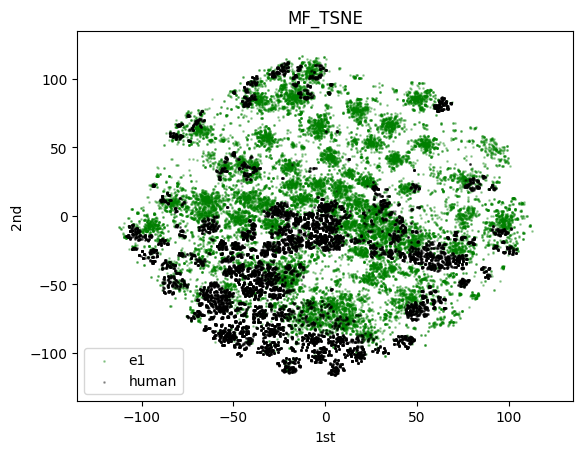

In [32]:
fig = plt.figure()
plt.scatter(MF_tsne_e1['TSNE_0'], MF_tsne_e1['TSNE_1'], color='green', label='e1', s=1, alpha=0.3)
plt.scatter(MF_tsne_human['TSNE_0'], MF_tsne_human['TSNE_1'], color='black', label='human', s=1, alpha=0.3)
plt.title("MF_TSNE")
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-135, 135)
plt.ylim(-135, 135)
plt.legend(loc='lower left') 
plt.show()
fig.savefig('result/MF/TSNE_0.png')

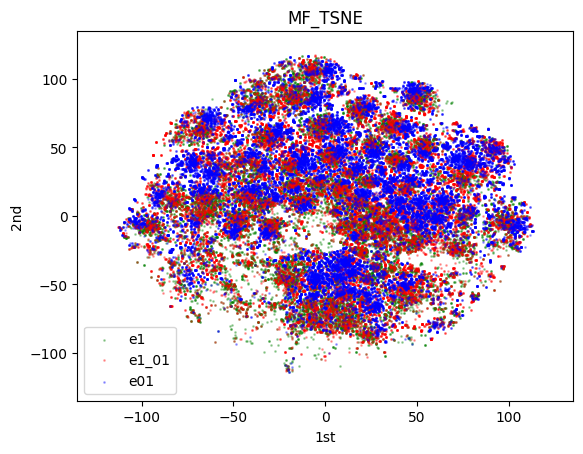

In [33]:
fig = plt.figure()
plt.scatter(MF_tsne_e1['TSNE_0'], MF_tsne_e1['TSNE_1'], color='green', label='e1', s=1, alpha=0.3)
plt.scatter(MF_tsne_e1_01['TSNE_0'], MF_tsne_e1_01['TSNE_1'], color='red', label='e1_01', s=1, alpha=0.3)
plt.scatter(MF_tsne_e01['TSNE_0'], MF_tsne_e01['TSNE_1'], color='blue', label='e01', s=1, alpha=0.3)
plt.title("MF_TSNE")
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-135, 135)
plt.ylim(-135, 135)
plt.legend(loc='lower left')
plt.show()
fig.savefig('result/MF/TSNE_1.png')

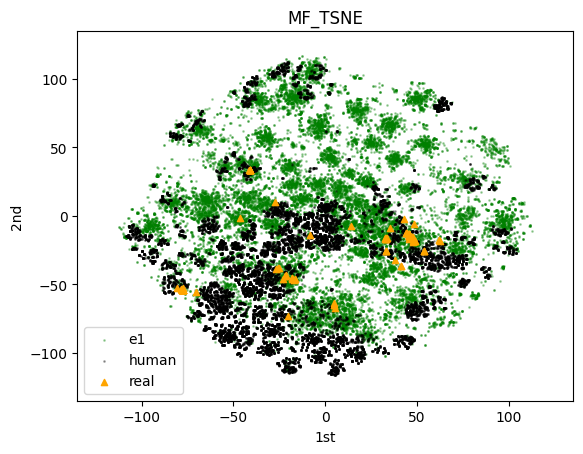

In [34]:
fig = plt.figure()
plt.scatter(MF_tsne_e1['TSNE_0'], MF_tsne_e1['TSNE_1'], color='green', label='e1', s=1, alpha=0.3)
plt.scatter(MF_tsne_human['TSNE_0'], MF_tsne_human['TSNE_1'], color='black', label='human', s=1, alpha=0.3)
plt.scatter(MF_tsne_real['TSNE_0'], MF_tsne_real['TSNE_1'], color='orange', label='real', marker='^', s=20)
plt.title("MF_TSNE")
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-135, 135)
plt.ylim(-135, 135)
plt.legend(loc='lower left') 
plt.show()
fig.savefig('result/MF/TSNE_2.png')